In [164]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser
import sys
import warnings
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
covid = pd.read_csv("C:/Users/MartinV/Downloads/Covid Continent.csv")
euribor = pd.read_excel("C:/Users/MartinV/Downloads/Euribor.xlsx")

In [2]:
covid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,3/13/2020,2.0,2.0,0.0,0.0,18.733,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,3/20/2020,4.0,2.0,0.0,0.0,37.465,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,3/24/2020,12.0,8.0,0.0,0.0,112.395,74.930,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,3/25/2020,17.0,5.0,0.0,0.0,159.227,46.831,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,3/26/2020,19.0,2.0,0.0,0.0,177.959,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35078,NaN,NaN,International,2/28/2020,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35079,NaN,NaN,International,2/29/2020,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35080,NaN,NaN,International,3/1/2020,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35081,NaN,NaN,International,3/2/2020,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
euribor

,Date,Interest Rate
0,2020-05-01,-0.157
1,2020-05-02,-0.157
2,2020-05-03,-0.157
3,2020-05-04,-0.157
4,2020-05-05,-0.165
...,...,...
93,2020-08-02,-0.407
94,2020-08-03,-0.417
95,2020-08-04,-0.421
96,2020-08-05,-0.418


In [4]:
covid = covid.loc[covid['continent'] == 'Europe']

In [5]:
covid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
618,ALB,Europe,Albania,3/9/2020,2.0,2.0,0.0,0.0,0.695,0.695,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
619,ALB,Europe,Albania,3/10/2020,6.0,4.0,0.0,0.0,2.085,1.390,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
620,ALB,Europe,Albania,3/11/2020,10.0,4.0,0.0,0.0,3.475,1.390,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
621,ALB,Europe,Albania,3/12/2020,11.0,1.0,1.0,1.0,3.822,0.347,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
622,ALB,Europe,Albania,3/13/2020,23.0,12.0,1.0,0.0,7.992,4.170,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34213,OWID_KOS,Europe,Kosovo,8/2/2020,8104.0,0.0,212.0,0.0,4192.937,0.000,...,NaN,9795.834,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34214,OWID_KOS,Europe,Kosovo,8/3/2020,8799.0,695.0,249.0,37.0,4552.524,359.587,...,NaN,9795.834,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34215,OWID_KOS,Europe,Kosovo,8/4/2020,9049.0,250.0,256.0,7.0,4681.872,129.348,...,NaN,9795.834,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34216,OWID_KOS,Europe,Kosovo,8/5/2020,9274.0,225.0,296.0,40.0,4798.285,116.413,...,NaN,9795.834,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# get dates
def get_dates(dates):
    dates_array = []
    
    for i in range(len(dates)):
        date = str(dates.iloc[i])
        dates_array.append(parser.parse(date))
    return dates_array

euribor_dates = get_dates(euribor['Date'])
covid_dates = get_dates(covid['date'])

In [7]:
# reduce covid dataset May to Aug 2020, replace NaN
euribor['Date'] = euribor_dates
covid.iloc[:, 3] = covid_dates #?
res = covid[~(covid['date'] < '2020-05-01')]
res = res.fillna(0)

In [13]:
# group by countries
groups = []
countries = set(np.array(covid['location']))
for country in countries:
    grouped = res.groupby(res.location)
    group = grouped.get_group(country)
    groups.append(group)

In [14]:
groups

[     iso_code continent location       date  total_cases  new_cases  \
 2006      AUT    Europe  Austria 2020-05-01      15424.0       60.0   
 2007      AUT    Europe  Austria 2020-05-02      15458.0       34.0   
 2008      AUT    Europe  Austria 2020-05-03      15470.0       12.0   
 2009      AUT    Europe  Austria 2020-05-04      15538.0       68.0   
 2010      AUT    Europe  Austria 2020-05-05      15569.0       31.0   
 ...       ...       ...      ...        ...          ...        ...   
 2099      AUT    Europe  Austria 2020-08-02      21224.0      126.0   
 2100      AUT    Europe  Austria 2020-08-03      21309.0       85.0   
 2101      AUT    Europe  Austria 2020-08-04      21341.0       32.0   
 2102      AUT    Europe  Austria 2020-08-05      21472.0      131.0   
 2103      AUT    Europe  Austria 2020-08-06      21575.0      103.0   
 
       total_deaths  new_deaths  total_cases_per_million  \
 2006         584.0         4.0                 1712.560   
 2007         

In [15]:
# ?
for i in range(len(groups)):
    if (len(groups[i]) == 97):
        groups[i].loc[len(groups[i])] = 0

In [18]:
# total cases add ??
total_cases_per_million = np.zeros(98)
for i in range(len(groups)):
    df = groups[i]
    total_cases_per_million = np.add(total_cases_per_million, np.array(df['total_cases_per_million']))

In [20]:
dates = euribor_dates
euribor_rates = list(euribor.iloc[:,1])

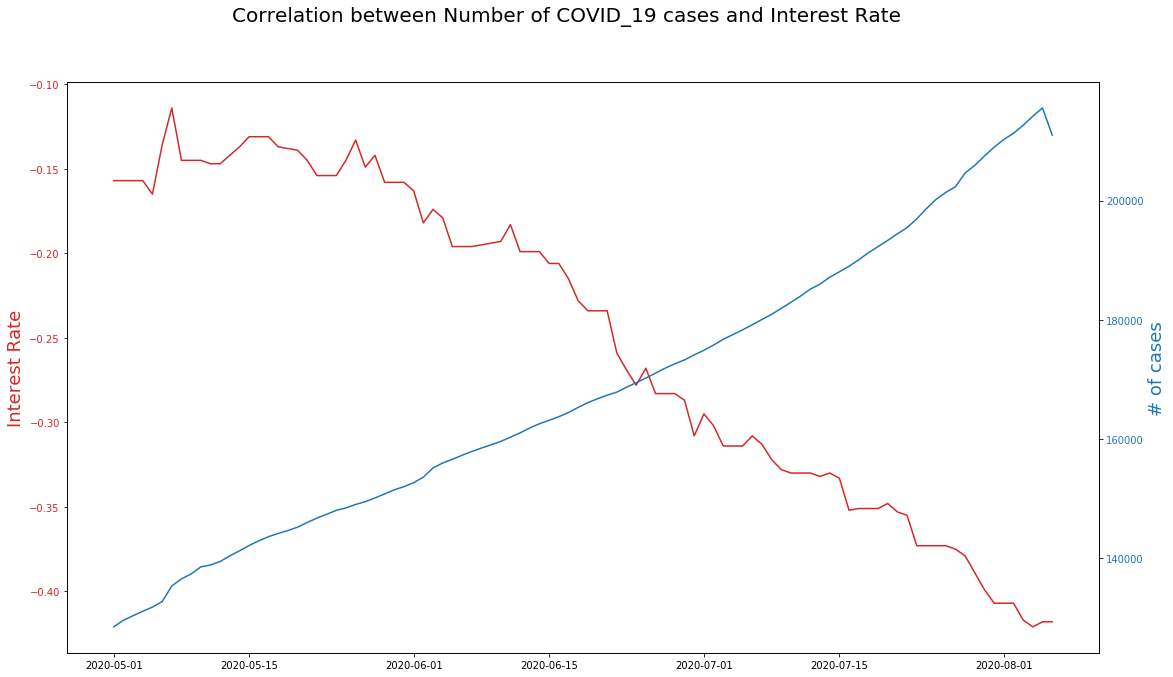

In [27]:
# Show plot
fig, ax1 = plt.subplots()

fig.suptitle('Correlation between Number of COVID_19 cases and Interest Rate', fontsize=20)

color = 'tab:red'
# ax1.set_xlabel('Dates')
ax1.set_ylabel('Interest Rate', color=color, fontsize=18)
ax1.plot(dates, euribor_rates, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of cases', color=color, fontsize=18)
ax2.plot(dates, total_cases_per_million, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [32]:
# Linear Regression Model1
model = LinearRegression()
regressor = model.fit(total_cases_per_million.reshape((-1,1)), euribor_rates) #reshape used because expected 2D got 1D

In [34]:
regressor.score(total_cases_per_million.reshape((-1,1)), euribor_rates) # ?? za kolku se zgolemuva sekoe 

0.9445968634863597

In [66]:
linregressResult = stats.linregress(total_cases_per_million, euribor_rates) #? sho znacat
linregressResult

LinregressResult(slope=-3.903807031287853e-06, intercept=0.40686011098571273, rvalue=-0.9719037315940092, pvalue=4.0873289265854505e-62, stderr=9.649318726687166e-08)

In [69]:
# ? so e razlika so model 2 
# Linear Regression Model2
period = np.linspace(0, 98, 98) # vat iz period?
model2 = LinearRegression()
regressor2 = model2.fit(period.reshape((-1,1)), total_cases_per_million)
predict = np.linspace(98,245,147)

In [72]:
# 
predicted = model2.predict(predict.reshape((-1,1)))
predicted

array([208227.44017934, 209053.17141835, 209878.90265736, 210704.63389637,
       211530.36513538, 212356.09637438, 213181.82761339, 214007.5588524 ,
       214833.29009141, 215659.02133042, 216484.75256943, 217310.48380843,
       218136.21504744, 218961.94628645, 219787.67752546, 220613.40876447,
       221439.14000347, 222264.87124248, 223090.60248149, 223916.3337205 ,
       224742.06495951, 225567.79619851, 226393.52743752, 227219.25867653,
       228044.98991554, 228870.72115455, 229696.45239355, 230522.18363256,
       231347.91487157, 232173.64611058, 232999.37734959, 233825.10858859,
       234650.8398276 , 235476.57106661, 236302.30230562, 237128.03354463,
       237953.76478363, 238779.49602264, 239605.22726165, 240430.95850066,
       241256.68973967, 242082.42097867, 242908.15221768, 243733.88345669,
       244559.6146957 , 245385.34593471, 246211.07717372, 247036.80841272,
       247862.53965173, 248688.27089074, 249514.00212975, 250339.73336876,
       251165.46460776, 2

In [73]:
interest_rates = model.predict(predicted.reshape((-1,1)))
interest_rates

array([-0.40601963, -0.40924313, -0.41246662, -0.41569012, -0.41891362,
       -0.42213711, -0.42536061, -0.4285841 , -0.4318076 , -0.43503109,
       -0.43825459, -0.44147808, -0.44470158, -0.44792507, -0.45114857,
       -0.45437207, -0.45759556, -0.46081906, -0.46404255, -0.46726605,
       -0.47048954, -0.47371304, -0.47693653, -0.48016003, -0.48338352,
       -0.48660702, -0.48983051, -0.49305401, -0.49627751, -0.499501  ,
       -0.5027245 , -0.50594799, -0.50917149, -0.51239498, -0.51561848,
       -0.51884197, -0.52206547, -0.52528896, -0.52851246, -0.53173596,
       -0.53495945, -0.53818295, -0.54140644, -0.54462994, -0.54785343,
       -0.55107693, -0.55430042, -0.55752392, -0.56074741, -0.56397091,
       -0.5671944 , -0.5704179 , -0.5736414 , -0.57686489, -0.58008839,
       -0.58331188, -0.58653538, -0.58975887, -0.59298237, -0.59620586,
       -0.59942936, -0.60265285, -0.60587635, -0.60909985, -0.61232334,
       -0.61554684, -0.61877033, -0.62199383, -0.62521732, -0.62

In [81]:
from datetime import date, timedelta
sdate = date(2020, 8, 7)   # start date
edate = date(2020, 12, 31)   # end date

delta = edate - sdate       # as timedelta
days = []
for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    days.append(day)

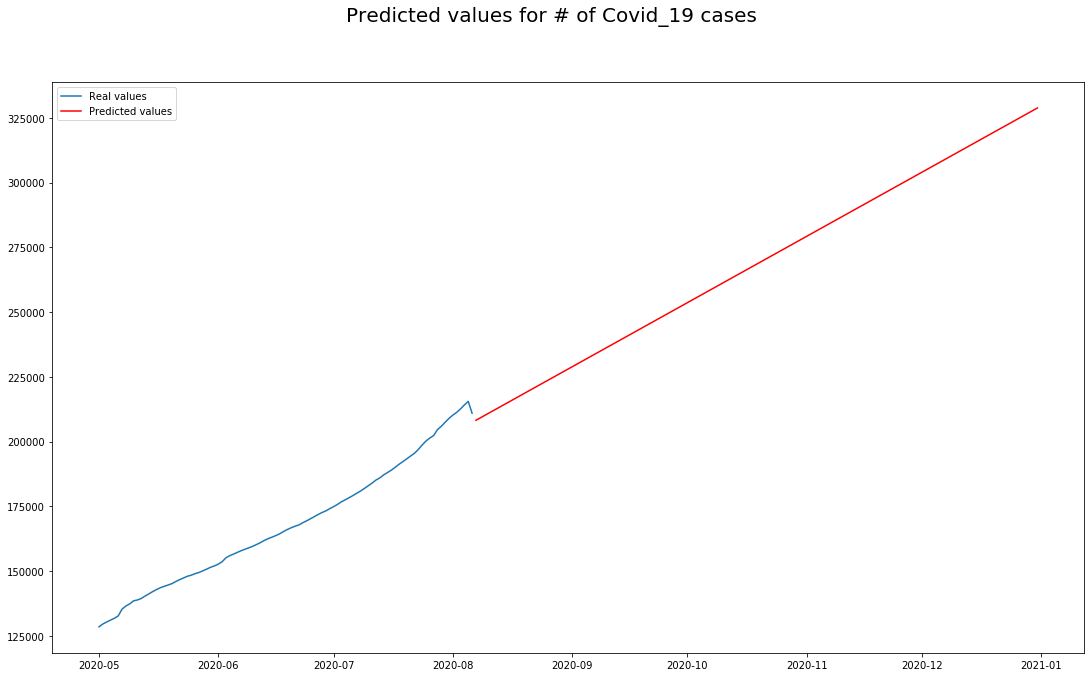

In [85]:
# Show plot for predicted covid_19 cases
fig, ax1 = plt.subplots()
fig.suptitle('Predicted values for # of Covid_19 cases', fontsize=20)

plt.plot(dates, total_cases_per_million, label='Real values')
plt.plot(days, predicted, color = 'red', label='Predicted values')

fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.show()

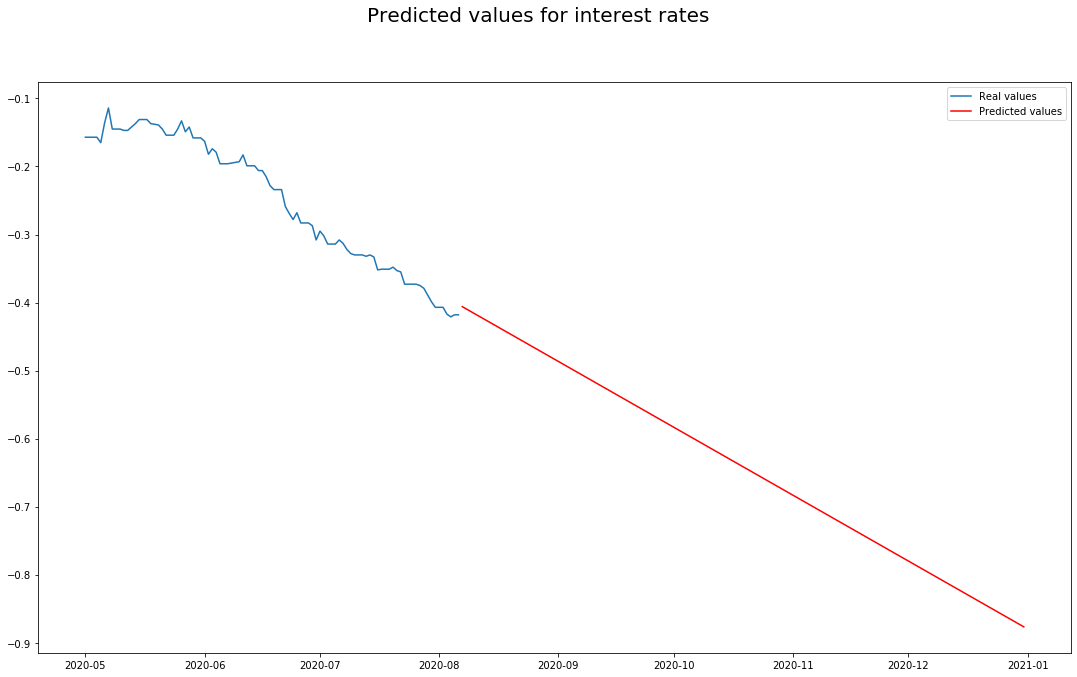

In [87]:
# Show plot for predicted interest rates
fig, ax1 = plt.subplots()
fig.suptitle('Predicted values for interest rates', fontsize=20)

plt.plot(dates, euribor_rates, label='Real values')
plt.plot(days, interest_rates, color = 'red', label='Predicted values')

fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   97
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -765.446
Method:                       css-mle   S.D. of innovations            646.157
Date:                Tue, 11 Aug 2020   AIC                           1544.891
Time:                        20:03:06   BIC                           1562.914
Sample:                             1   HQIC                          1552.179
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        819.9803    112.749      7.273      0.000     598.996    1040.965
ar.L1.D.y      0.2829      0.217      1.303      0.193      -0.143       0.708
ar.L2.D.y     -0.1398      0.225     -0.622      0.5

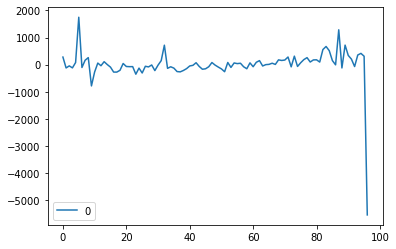

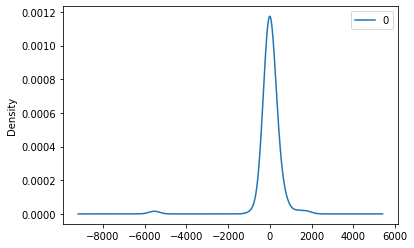

                 0
count    97.000000
mean     -0.986305
std     649.593012
min   -5539.134391
25%    -102.849510
50%      -9.494014
75%     151.372636
max    1750.544739


In [100]:
# ARIMA Model
model = ARIMA(total_cases_per_million, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=177523.864905, expected=177523.077000
predicted=178306.014712, expected=178319.389000
predicted=179104.679102, expected=179161.487000
predicted=179927.650218, expected=180061.140000
predicted=180918.827603, expected=180922.356000
predicted=181724.013463, expected=181918.091000
predicted=182781.463582, expected=182944.844000
predicted=183795.168712, expected=183983.731000
predicted=184887.176511, expected=185147.190000
predicted=186072.430715, expected=185990.806000
predicted=186786.380639, expected=187138.278000
predicted=188136.150470, expected=188050.506000
predicted=188828.833672, expected=188976.023000
predicted=189951.686084, expected=190066.021000
predicted=190919.069102, expected=191245.124000
predicted=192263.859335, expected=192278.140000
predicted=193199.262400, expected=193325.436000
predicted=194249.777902, expected=194423.049000
predicted=195364.493979, expected=195462.000000
predicted=196436.513682, expected=196936.863000
predicted=198099.507962, expected=198647

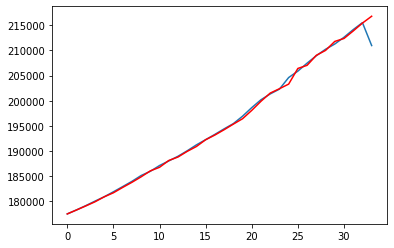

In [101]:
from sklearn.metrics import mean_squared_error
X = total_cases_per_million
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=-0.315222, expected=-0.314000
predicted=-0.313040, expected=-0.314000
predicted=-0.319315, expected=-0.308000
predicted=-0.312625, expected=-0.313000
predicted=-0.315431, expected=-0.322000
predicted=-0.322301, expected=-0.328000
predicted=-0.328378, expected=-0.330000
predicted=-0.332856, expected=-0.330000
predicted=-0.333611, expected=-0.330000
predicted=-0.333270, expected=-0.332000
predicted=-0.334592, expected=-0.330000
predicted=-0.332749, expected=-0.333000
predicted=-0.335775, expected=-0.352000
predicted=-0.351923, expected=-0.351000
predicted=-0.351090, expected=-0.351000
predicted=-0.355414, expected=-0.351000
predicted=-0.355356, expected=-0.348000
predicted=-0.350644, expected=-0.353000
predicted=-0.355836, expected=-0.355000
predicted=-0.356820, expected=-0.373000
predicted=-0.373281, expected=-0.373000
predicted=-0.373872, expected=-0.373000
predicted=-0.376552, expected=-0.373000
predicted=-0.377068, expected=-0.375000
predicted=-0.377144, expected=-0.379000


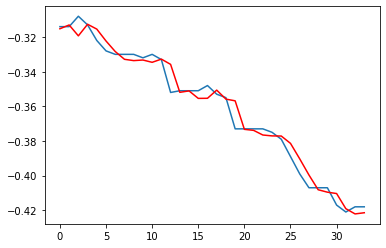

In [103]:
X = euribor_rates
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=-0.422462, expected=-0.406020
predicted=-0.410438, expected=-0.409243
predicted=-0.413678, expected=-0.412467
predicted=-0.414853, expected=-0.415690
predicted=-0.417787, expected=-0.418914
predicted=-0.422029, expected=-0.422137
predicted=-0.424554, expected=-0.425361
predicted=-0.427786, expected=-0.428584
predicted=-0.431017, expected=-0.431808
predicted=-0.434248, expected=-0.435031
predicted=-0.437479, expected=-0.438255
predicted=-0.440710, expected=-0.441478
predicted=-0.443941, expected=-0.444702
predicted=-0.447172, expected=-0.447925
predicted=-0.450402, expected=-0.451149
predicted=-0.453633, expected=-0.454372
predicted=-0.456863, expected=-0.457596
predicted=-0.460093, expected=-0.460819
predicted=-0.463323, expected=-0.464043
predicted=-0.466553, expected=-0.467266
predicted=-0.469783, expected=-0.470490
predicted=-0.473012, expected=-0.473713
predicted=-0.476242, expected=-0.476937
predicted=-0.479471, expected=-0.480160
predicted=-0.482701, expected=-0.483384


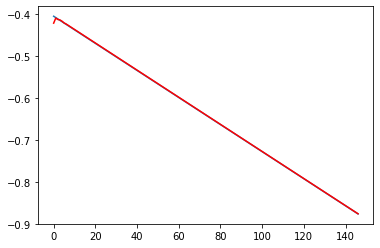

In [104]:
X = euribor_rates
#size = int(len(X) * 0.66)
train, test = X, interest_rates
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [89]:
# Part2 TODO explain

In [90]:
patientInfo = pd.read_csv("C:/Users/MartinV/Downloads/PatientInfo.csv")
patientInfo

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,6100000085,NaN,male,1990.0,30s,Korea,Gyeongsangnam-do,Changwon-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN,NaN,NaN
2239,7000000001,139.0,male,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,87.0,NaN,2020-02-20,NaN,NaN,isolated
2240,7000000002,222.0,female,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,84.0,NaN,2020-02-22,2020-03-07,NaN,released
2241,7000000003,4345.0,female,1972.0,40s,Korea,Jeju-do,etc,NaN,etc,NaN,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released


In [91]:
patientInfo = patientInfo[patientInfo['age'].notna()]
patientInfo

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,6100000085,NaN,male,1990.0,30s,Korea,Gyeongsangnam-do,Changwon-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN,NaN,NaN
2239,7000000001,139.0,male,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,87.0,NaN,2020-02-20,NaN,NaN,isolated
2240,7000000002,222.0,female,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,84.0,NaN,2020-02-22,2020-03-07,NaN,released
2241,7000000003,4345.0,female,1972.0,40s,Korea,Jeju-do,etc,NaN,etc,NaN,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released


In [144]:
age = np.array(patientInfo['age'])
age_intervals = set(np.array(patientInfo['age']))
age_interval = np.array(list(age_intervals))
age_cohorts = np.zeros((len(age), len(age_intervals)))

In [145]:
def convertAgeToNumber(arr):
    switcher = {
        "0s": 0,
        "10s": 1,
        "20s": 2,
        "30s": 3,
        "40s": 4,
        "50s": 5,
        "60s": 6,
        "70s": 7,
        "80s": 8,
        "90s": 9,
        "100s": 10
    }
    for i in range(len(arr)):
        arr[i] = switcher[arr[i]]

    return arr

In [146]:
convertedAges = convertAgeToNumber(age)
convertedAges

array([5, 3, 5, ..., 2, 4, 4], dtype=object)

In [161]:
# Binarize Patient Info State
def patientInfoStatesToInt(patientInfoStates):
    for i in range(len(patientInfoStates)):
        if patientInfoStates[i] == 'deceased':
            patientInfoStates[i] = 1
        else:
            patientInfoStates[i] = 0

    return patientInfoStates.astype('int')

patientInfoStates = patientInfoStatesToInt(np.array(patientInfo['state']))
patientInfoStates

array([0, 0, 0, ..., 0, 0, 0])

In [165]:
# Logistic Regression
clf = LogisticRegression(random_state=0).fit(convertedAges.reshape((-1,1)), patientInfoStates.reshape((-1,1)))
#clf.predict(X[:2, :])
#clf.predict_proba(X[:2, :])
clf.score(convertedAges.reshape((-1,1)), patientInfoStates)

0.9843828715365239